In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

<h1>Beer Recommender Analyse</h1>

Voor het maken van het KNN algoritme heb ik even een analyse gedaan over hoe de dataset er ongeveer uit ziet. Dit heb ik gedaan doorgebruik te maken van jupyter notebook en een aantal libraries. Dit geeft mij een inzicht in hoe ik dit allemaal moet aanpakken voordat ik een algoritme ga programmeren 


In [97]:
beers = pd.read_csv('C:\\Users\\Brand\\Desktop\\vakken_v1A_2021\\Ipass_2021\\Dataset\\beers.csv' , delimiter=',')
beers.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


<h1>Uitleg van alle kolomwaardes </h1>
<br></br>

<li> # -  Row number</li>
<li> abv - The alcoholic content by volume with 0 being no alcohol and 1 being pure alcohol</li>
<li> ibu - International bittering units, which describe how bitter a drink is.</li>
<li> id - Unique ID</li>
<li> name - Name of the beer.</li>
<li> style - Beer style (lager, ale, IPA, etc.)</li>
<li> brewery_id- Unique identifier for brewery that produces this beer; can use to join with brewery info.</li>
<li> ounces - Size of beer in ounces.</li>


<p><h2> Voor ons algoritme zijn lang niet alle waardes belangrijk. Het gaat bij een biertje namelijk vooral alleen om de:
    <li> abv</li>
    <li> ibu</li>
    <li> style</li>
</h2> </p>

In [62]:
df=beers[['abv','ibu','style']]
df.head(10)

,abv,ibu,style
0,0.050,NaN,American Pale Lager
1,0.066,NaN,American Pale Ale (APA)
2,0.071,NaN,American IPA
3,0.090,NaN,American Double / Imperial IPA
4,0.075,NaN,American IPA
5,0.077,NaN,Oatmeal Stout
6,0.045,NaN,American Pale Ale (APA)
7,0.065,NaN,American Porter
8,0.055,NaN,American Pale Ale (APA)
9,0.086,NaN,American Double / Imperial IPA


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1076 entries, 14 to 2408
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   abv     1076 non-null   float64
 1   ibu     1076 non-null   float64
 2   style   1076 non-null   object 
dtypes: float64(2), object(1)
memory usage: 29.4+ KB


<h2> Hieronder staan alle waardes waar wij mee te maken hebben, zo is er te zien dat we veel verschillende producten hebben, maar minder soorten ( Style) bier. Producten kunnen dus dezelfde Style hebben. </h2>

In [57]:
df['style'].unique()

array(['American Pale Lager', 'American Pale Ale (APA)', 'American IPA',
       'American Double / Imperial IPA', 'Oatmeal Stout',
       'American Porter', 'Saison / Farmhouse Ale', 'Belgian IPA',
       'Cider', 'Baltic Porter', 'Tripel', 'American Barleywine',
       'Winter Warmer', 'American Stout', 'Fruit / Vegetable Beer',
       'English Strong Ale', 'American Black Ale', 'Belgian Dark Ale',
       'American Blonde Ale', 'American Amber / Red Ale',
       'Berliner Weissbier', 'American Brown Ale',
       'American Pale Wheat Ale', 'Belgian Strong Dark Ale', 'Kölsch',
       'English Pale Ale', 'American Amber / Red Lager',
       'English Barleywine', 'Milk / Sweet Stout', 'German Pilsener',
       'Pumpkin Ale', 'Belgian Pale Ale', 'American Pilsner',
       'American Wild Ale', 'English Brown Ale', 'Altbier',
       'California Common / Steam Beer', 'Gose', 'Cream Ale',
       'Vienna Lager', 'Witbier', 'American Double / Imperial Stout',
       'Munich Helles Lager', 'Schwa

<h2> Hieronder zijn alle ABV waardes te zien, die zitten tussen de 0.00 en de 0.128 </h2>

In [70]:
df['abv'].unique()

array([0.05 , 0.066, 0.071, 0.09 , 0.075, 0.077, 0.045, 0.065, 0.055,
       0.086, 0.072, 0.073, 0.069, 0.085, 0.061, 0.06 , 0.082, 0.099,
       0.079, 0.044, 0.049, 0.07 , 0.097, 0.068, 0.083, 0.059, 0.035,
       0.046, 0.052, 0.054, 0.084, 0.038, 0.042, 0.08 , 0.125, 0.04 ,
       0.076, 0.051, 0.053, 0.057, 0.043, 0.062, 0.056, 0.048, 0.058,
       0.047, 0.092, 0.032, 0.064, 0.063, 0.067, 0.088, 0.078, 0.081,
       0.095, 0.041, 0.098,   nan, 0.096, 0.093, 0.039, 0.089, 0.074,
       0.027, 0.094, 0.087, 0.037, 0.034, 0.091, 0.1  , 0.12 , 0.001,
       0.128, 0.104, 0.028])

In [68]:
df['ibu'].unique()

array([ nan,  60.,  92.,  45.,  42.,  17.,  70.,  52.,  94.,  65.,  35.,
        82.,  11.,  18.,  28.,  50.,  15.,  75.,  30.,  26.,  13.,  68.,
        20.,  80.,  25.,  21.,  38.,  33.,  36., 103.,  40.,  43.,   4.,
         6.,  19.,  23.,  55.,  10.,  27.,  69.,  67., 138., 115.,  12.,
         8.,  62.,  22.,   5.,  41.,  46.,  48., 108.,  85.,  16.,  44.,
        87.,  32.,  34., 104.,  54.,  81.,  76.,  83.,  47.,  51.,  37.,
        72.,   7.,   9.,  64., 118.,  86.,  14., 100.,  24., 130.,  90.,
        99.,  77.,  58., 126.,  29.,  71.,  31.,  49.,  74.,  61.,  53.,
        97.,  73.,  66.,  95.,  93.,  88.,  98.,  39.,  78., 105., 111.,
        57., 113., 110.,  91., 120., 101.,  63.,  89., 135.])

<h2> Het is ook intressant om te weten wat het gemiddelde abv van een biertje is: </h2>

In [63]:
np.mean(beers['abv'])

0.05977342419080067

<h2> Hieronder zien we dat er eigenlijk maar 2 catergorieen zijn die deze dataset bevat, dat zijn bier

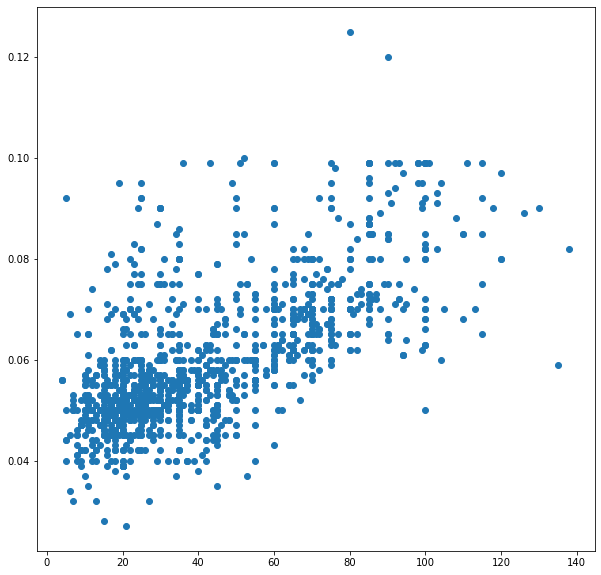

In [79]:
x = beers['ibu']
y = beers['abv']


plt.figure(figsize=(10,10))

plt.scatter(x, y)
plt.show()

<h2> Hierboven zien we alle soorten van de biertjes in de dataset. Zoals je ziet is ieder biertje anders. Het is nog wel heel druk in de grafiek. Ik heb zelf liever een kleinere selectie de grootste soorten met biertjes. Daarom kies ik alleen de bieren die vaker dan 10 keer voorkomen </h2>

In [85]:
final=df.groupby('style').filter(lambda x: len(x) > 15)

In [86]:
df = final.dropna()

In [92]:
df.head(15)

,abv,ibu,style
14,0.061,60.0,American Pale Ale (APA)
24,0.044,42.0,American Pale Ale (APA)
25,0.049,17.0,Fruit / Vegetable Beer
26,0.049,17.0,Fruit / Vegetable Beer
27,0.049,17.0,Fruit / Vegetable Beer
28,0.070,70.0,American IPA
29,0.070,70.0,American IPA
30,0.070,70.0,American IPA
32,0.097,94.0,American Double / Imperial IPA
33,0.044,42.0,American Pale Ale (APA)


In [88]:
df['style'].unique()

array(['American Pale Ale (APA)', 'Fruit / Vegetable Beer',
       'American IPA', 'American Double / Imperial IPA',
       'American Black Ale', 'American Blonde Ale',
       'American Pale Wheat Ale', 'Kölsch', 'American Amber / Red Lager',
       'American Brown Ale', 'German Pilsener', 'Saison / Farmhouse Ale',
       'American Stout', 'Cream Ale', 'American Amber / Red Ale',
       'American Porter', 'Witbier', 'Märzen / Oktoberfest',
       'American Pale Lager', 'Hefeweizen', 'Czech Pilsener'],
      dtype=object)

In [98]:
df.head()

14    American Pale Ale (APA)
24    American Pale Ale (APA)
25     Fruit / Vegetable Beer
26     Fruit / Vegetable Beer
27     Fruit / Vegetable Beer
Name: style, dtype: object

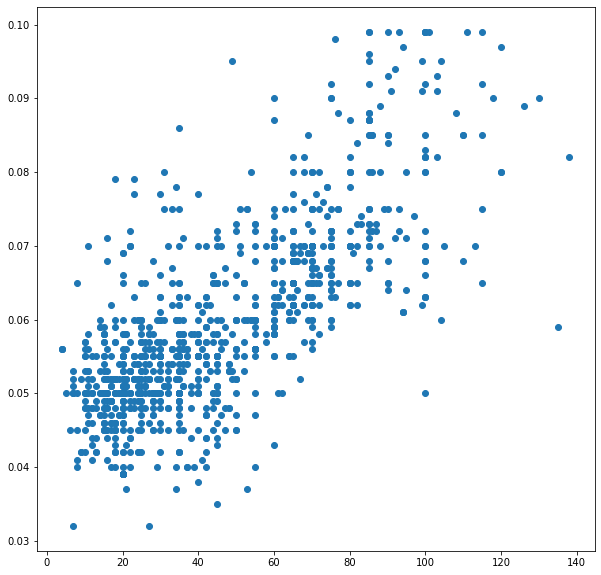

In [141]:
x = df['ibu']
y = df['abv']


plt.figure(figsize=(10,10))

plt.scatter(x, y)
plt.show()


<h2> De waardes zijn nu beter verspreid, als we er een kleur aan toevoegen kunnen we zien hoe de verschillende soorten bieren verdeeld zijn over de grafiek</h2>

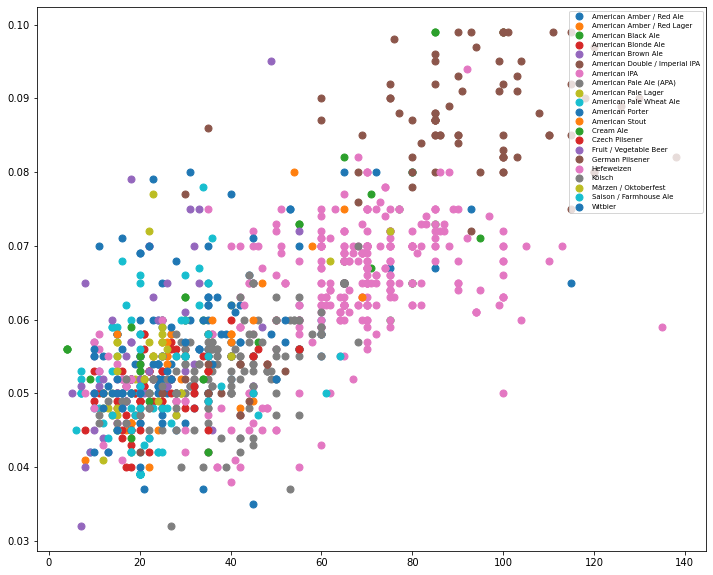

In [183]:
style = df.groupby(df['style'])
plt.figure(figsize=(12,10))

for name, style in style:
    plt.plot(style.ibu , style.abv, marker='o', linestyle='', markersize=7, label=name)

plt.legend(loc=1, prop={'size': 7})
plt.show()




<h2> Er blijven 1076 waardes over om mee te werken. Ik vind dit zelf voor het algoritme op het moment genoeg en het zorgt ervoor dat het overzichtelijkblijft. Met deze data zal ik vervolgens gaan werken om het KNN algoritme te schrijven </h2>


In [102]:
df.count()

abv      1076
ibu      1076
style    1076
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1076 entries, 14 to 2408
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   abv     1076 non-null   float64
 1   ibu     1076 non-null   float64
 2   style   1076 non-null   object 
dtypes: float64(2), object(1)
memory usage: 29.4+ KB


In [109]:
df['abv'].isnull().values.any()



False

In [110]:
df['ibu'].isnull().values.any()

False

In [111]:
df['style'].isnull().values.any()

False

<h2> De informatie hierboven geeft ook aan dat de dataset helemaal compleet is en er geen waardes ontbreken. Dat is fijn want dan lopen we tijdens het programmeren niet aan tegen fouten oid. </h2>